In [99]:
import pandas as pd
import json
from tqdm.notebook import tqdm

In [2]:
f = open('data/2-2021/game_1485184.json',)
  
# returns JSON object as 
# a dictionary
data = json.load(f)
  

In [3]:
data

{'playerIdNameDictionary': {'84129': 'Matej Vydra',
  '41868': 'JÃ³hann Gudmundsson',
  '93473': 'Robbie Brady',
  '74606': 'Kevin Long',
  '24148': 'Erik Pieters',
  '73380': 'Chris Wood',
  '79050': 'Ashley Westwood',
  '80067': 'Matthew Lowton',
  '22847': 'Jack Cork',
  '24238': 'Dale Stephens',
  '33386': 'Ashley Barnes',
  '33891': 'Jay Rodriguez',
  '94935': 'Ben Mee',
  '105720': 'Nick Pope',
  '131464': 'James Tarkowski',
  '138929': 'Josh Brownhill',
  '139866': 'Will Norris',
  '357427': 'Dwight McNeil',
  '18181': 'Phil Bardsley',
  '369466': 'Josh Benson',
  '114397': 'Fred',
  '125793': 'Alex Telles',
  '122366': 'Anthony Martial',
  '97752': 'Paul Pogba',
  '275035': 'Donny van de Beek',
  '123761': 'Bruno Fernandes',
  '38128': 'Nemanja Matic',
  '79554': 'David de Gea',
  '25363': 'Juan Mata',
  '24328': 'Edinson Cavani',
  '99487': 'Harry Maguire',
  '118244': 'Luke Shaw',
  '299271': 'Axel Tuanzebe',
  '300299': 'Marcus Rashford',
  '304008': 'Dean Henderson',
  '331

In [4]:
data.keys()

dict_keys(['playerIdNameDictionary', 'periodMinuteLimits', 'timeStamp', 'attendance', 'venueName', 'referee', 'weatherCode', 'elapsed', 'startTime', 'startDate', 'score', 'htScore', 'ftScore', 'etScore', 'pkScore', 'statusCode', 'periodCode', 'home', 'away', 'maxMinute', 'minuteExpanded', 'maxPeriod', 'expandedMinutes', 'expandedMaxMinute', 'periodEndMinutes', 'commonEvents', 'events', 'timeoutInSeconds'])

In [5]:
events = data['events']

In [6]:
player_id = data['playerIdNameDictionary']

In [7]:
events

[{'id': 2253487473.0,
  'eventId': 2,
  'minute': 0,
  'second': 0,
  'teamId': 32,
  'x': 0.0,
  'y': 0.0,
  'expandedMinute': 0,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 32, 'displayName': 'Start'},
  'outcomeType': {'value': 1, 'displayName': 'Successful'},
  'qualifiers': [],
  'satisfiedEventsTypes': [],
  'isTouch': False},
 {'id': 2253487469.0,
  'eventId': 1000003,
  'minute': 0,
  'second': 0,
  'teamId': 184,
  'x': 0.0,
  'y': 0.0,
  'expandedMinute': 0,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 32, 'displayName': 'Start'},
  'outcomeType': {'value': 1, 'displayName': 'Successful'},
  'qualifiers': [],
  'satisfiedEventsTypes': [],
  'isTouch': False},
 {'id': 2253487625.0,
  'eventId': 1000004,
  'minute': 0,
  'second': 0,
  'teamId': 184,
  'playerId': 79050,
  'x': 50.3,
  'y': 50.3,
  'expandedMinute': 0,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 1, 'displayName': 'Pass'},
 

In [147]:
df = pd.json_normalize(events)

In [148]:
df.drop(['type.value','outcomeType.value'],axis=1,inplace=True)

In [149]:
df = df.rename(columns={"type.displayName":"event_name","outcomeType.displayName":"outcome"})

In [150]:
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,relatedEventId,relatedPlayerId,goalMouthZ,goalMouthY,isShot,blockedX,blockedY,cardType.value,cardType.displayName,isGoal
0,2.253487e+09,2,0,0.0,32,0.0,0.0,0,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.253487e+09,1000003,0,0.0,184,0.0,0.0,0,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.253488e+09,1000004,0,0.0,184,50.3,50.3,0,"[{'type': {'value': 213, 'displayName': 'Angle...","[90, 116, 29, 34, 214, 217]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.253488e+09,1000005,0,2.0,184,29.6,53.4,0,"[{'type': {'value': 178, 'displayName': 'Stand...","[90, 116, 29, 35, 37, 215, 217]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.253488e+09,1000006,0,7.0,184,41.3,18.4,0,"[{'type': {'value': 1, 'displayName': 'Longbal...","[90, 118, 116, 122, 123, 126, 204, 38, 45, 35,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,2.253526e+09,1000726,97,25.0,184,0.0,0.0,102,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1547,2.253526e+09,1000727,0,0.0,184,0.0,0.0,12,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1548,2.253526e+09,957,0,0.0,32,0.0,0.0,12,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1549,2.253458e+09,1000002,0,0.0,184,0.0,0.0,0,"[{'type': {'value': 131, 'displayName': 'TeamP...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'qualifiers', 'satisfiedEventsTypes', 'isTouch',
       'period.value', 'period.displayName', 'event_name', 'outcome',
       'playerId', 'endX', 'endY', 'relatedEventId', 'relatedPlayerId',
       'goalMouthZ', 'goalMouthY', 'isShot', 'blockedX', 'blockedY',
       'cardType.value', 'cardType.displayName', 'isGoal'],
      dtype='object')

In [40]:
throwins = df[pd.DataFrame(df.satisfiedEventsTypes.to_list()).isin([211]).any(1).values]

In [85]:
throwins = throwins.index

In [87]:
throwins

Int64Index([  15,   31,   84,  152,  194,  385,  398,  490,  494,  543,  651,
             669,  698,  704,  745,  748,  772,  794,  800,  840,  887,  905,
            1085, 1105, 1218, 1239, 1248, 1254, 1327, 1331, 1338, 1462, 1502,
            1526, 1541, 1544],
           dtype='int64')

In [96]:
summary_cols = ['minute','second','teamId','x','y','endX','endY','event_name','outcome','playerId']

,minute,second,x,y,endX,endY,event_name,outcome
1394,83,50.0,45.3,12.4,85.9,44.0,Pass,Successful
1395,83,53.0,85.8,44.0,NaN,NaN,BallTouch,Unsuccessful
1396,83,53.0,11.2,60.2,NaN,NaN,BallTouch,Successful
1397,83,54.0,13.1,57.5,NaN,NaN,BallRecovery,Successful
1398,83,55.0,12.4,60.6,45.9,52.7,Pass,Unsuccessful
1399,83,58.0,53.4,46.9,42.9,71.9,Pass,Successful
1400,84,0.0,42.9,71.9,NaN,NaN,BallRecovery,Successful
1401,84,1.0,56.4,24.1,NaN,NaN,Challenge,Unsuccessful


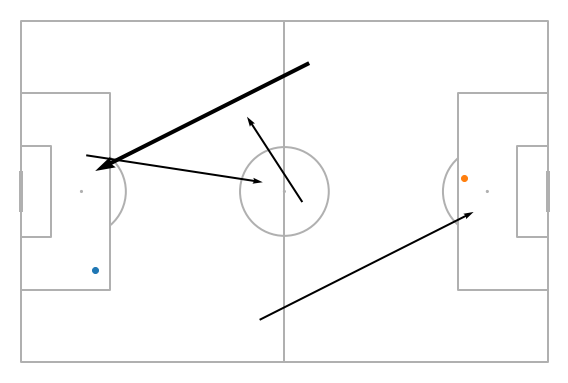

In [79]:
def sequences(df,col_name,col_name2,teamId,value):
    '''
    Input:
    df - dataframe to extract sequence
    col_name - column for applying condition 
    col_name2 - column for identifying outcomes ie True or False
    teamId - team which is currently in possession
    value - check for value
    
    Output:
    returns list of tuples containing sequence start end indices
    '''
    

    # flag the row at the start of the pattern
    seq =    ~ (df[col_name].eq(teamId)) & \
    ~ (df[col_name].shift(-1).eq(teamId)) & \
    ~ (df[col_name].shift(-2).eq(teamId)) & \
    ~ (df[col_name].shift(-3).eq(teamId))
    
    seq2 = (df[col_name2].eq(value)) & \
     (df[col_name2].shift(-1).eq(value)) & \
     (df[col_name2].shift(-2).eq(value)) & \
     (df[col_name2].shift(-3).eq(value))
    
#     print(~ (df[col_name].eq(teamId)),
#     ~ (df[col_name].shift(-1).eq(teamId)) ,
#     ~ (df[col_name].shift(-2).eq(teamId)),
#     ~ (df[col_name].shift(-3).eq(teamId)))
    
#     i=0
#     for a,b in zip(seq,seq2):
#         print(i,a,b,a&b)
#         i+=1
    seq = seq & seq2
    try:
#         display(df.iloc[:seq[seq].index.values[0]])
#         print(seq)
#         print(seq)
        return seq[seq].index.values[0]
    except:
        return seq.index.values[-1]

In [92]:
sequences(df[throwins[0]:throwins[1]],'teamId','outcome',df.iloc[throwins[0]]['teamId'],'Successful')

30

In [97]:
df[throwins[0]:throwins[1]][summary_cols]

,minute,second,teamId,x,y,endX,endY,event_name,outcome,playerId
15,1,6.0,184,60.0,100.0,78.0,93.5,Pass,Successful,24148.0
16,1,8.0,184,78.0,93.5,81.5,92.1,Pass,Unsuccessful,73380.0
17,1,8.0,32,17.6,10.0,NaN,NaN,BallRecovery,Successful,243814.0
18,1,9.0,32,17.6,9.2,42.4,14.3,Pass,Unsuccessful,243814.0
19,1,13.0,184,56.1,85.3,66.5,80.0,Pass,Unsuccessful,94935.0
20,1,15.0,32,32.1,27.7,NaN,NaN,BallTouch,Unsuccessful,97752.0
21,1,17.0,184,63.7,63.5,59.8,35.9,Pass,Unsuccessful,73380.0
22,1,19.0,32,40.2,65.1,31.1,74.1,Pass,Successful,122366.0
23,1,21.0,32,31.0,87.5,NaN,NaN,BallRecovery,Successful,118244.0
24,1,25.0,32,32.9,90.9,18.2,85.0,Pass,Successful,118244.0


In [101]:
t_seq = []
throw_in_idx = throwins
for i,s_idx in enumerate(tqdm(throw_in_idx[:-1])):
    
    e_idx = sequences(df.loc[s_idx:throw_in_idx[i+1]],
                      'teamId','outcome',
                      df.loc[s_idx]['teamId'],
                      'Successful')
    t_seq.append((s_idx,e_idx))

t_seq.append((throw_in_idx[-1],sequences(df.loc[throw_in_idx[-1]:],
                      'teamId','outcome',
                      df.loc[throw_in_idx[-1]]['teamId'],
                      'Successful')))

  0%|          | 0/35 [00:00<?, ?it/s]

In [104]:
df.iloc[throw_in_idx][summary_cols]

,minute,second,teamId,x,y,endX,endY,event_name,outcome,playerId
15,1,6.0,184,60.0,100.0,78.0,93.5,Pass,Successful,24148.0
31,1,47.0,32,60.4,0.0,41.2,5.5,Pass,Successful,123761.0
84,3,59.0,32,63.7,0.0,66.0,9.2,Pass,Successful,331924.0
152,7,24.0,184,38.1,100.0,37.5,89.1,Pass,Successful,24148.0
194,10,17.0,184,67.5,100.0,81.5,85.1,Pass,Unsuccessful,24148.0
385,24,12.0,184,9.4,100.0,32.6,96.5,Pass,Successful,24148.0
398,25,26.0,184,31.0,100.0,23.2,90.6,Pass,Successful,24148.0
490,36,25.0,32,30.1,0.0,27.8,11.2,Pass,Successful,123761.0
494,36,53.0,32,45.4,0.0,35.8,6.0,Pass,Successful,331924.0
543,40,38.0,32,51.5,0.0,39.1,5.6,Pass,Successful,300299.0


In [146]:
def adjust_coordinates(df,home_team,x='x',y='y',endX='endX',endY='endY'):
    '''
    Input:
    df - dataframe containing events
    home_team - teamId of hometeam (attacks left to right)
    x,y,endX,endY: column names of x,y,endx,endy
    
    Output:
    modifies dataframe in place 
    '''
#     df.loc[df.query(f'teamId != {home_team}').index][[x,y,endX,endY]] = 100 - df[~(df.teamId == home_team)][[x,y,endX,endY]].values
    df.loc[~(df.teamId == home_team),x] =  100 - df[~(df.teamId == home_team)][x].values
    df.loc[~(df.teamId == home_team),y] =  100 - df[~(df.teamId == home_team)][y].values
    df.loc[~(df.teamId == home_team),endX] =  100 - df[~(df.teamId == home_team)][endX].values
    df.loc[~(df.teamId == home_team),endY] =  100 - df[~(df.teamId == home_team)][endY].values

In [151]:
adjust_coordinates(df,32)

,id,eventId,minute,second,teamId,x,y,expandedMinute,qualifiers,satisfiedEventsTypes,...,relatedEventId,relatedPlayerId,goalMouthZ,goalMouthY,isShot,blockedX,blockedY,cardType.value,cardType.displayName,isGoal
0,2.253487e+09,2,0,0.0,32,0.0,0.0,0,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.253487e+09,1000003,0,0.0,184,100.0,100.0,0,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.253488e+09,1000004,0,0.0,184,49.7,49.7,0,"[{'type': {'value': 213, 'displayName': 'Angle...","[90, 116, 29, 34, 214, 217]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.253488e+09,1000005,0,2.0,184,70.4,46.6,0,"[{'type': {'value': 178, 'displayName': 'Stand...","[90, 116, 29, 35, 37, 215, 217]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.253488e+09,1000006,0,7.0,184,58.7,81.6,0,"[{'type': {'value': 1, 'displayName': 'Longbal...","[90, 118, 116, 122, 123, 126, 204, 38, 45, 35,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,2.253526e+09,1000726,97,25.0,184,100.0,100.0,102,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1547,2.253526e+09,1000727,0,0.0,184,100.0,100.0,12,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1548,2.253526e+09,957,0,0.0,32,0.0,0.0,12,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1549,2.253458e+09,1000002,0,0.0,184,100.0,100.0,0,"[{'type': {'value': 131, 'displayName': 'TeamP...",[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
df[summary_cols]

,minute,second,teamId,x,y,endX,endY,event_name,outcome,playerId
0,0,0.0,32,0.0,0.0,NaN,NaN,Start,Successful,NaN
1,0,0.0,184,100.0,100.0,NaN,NaN,Start,Successful,NaN
2,0,0.0,184,49.7,49.7,69.5,49.7,Pass,Successful,79050.0
3,0,2.0,184,70.4,46.6,63.6,76.7,Pass,Successful,131464.0
4,0,7.0,184,58.7,81.6,14.0,26.9,Pass,Successful,80067.0
...,...,...,...,...,...,...,...,...,...,...
1546,97,25.0,184,100.0,100.0,NaN,NaN,End,Successful,NaN
1547,0,0.0,184,100.0,100.0,NaN,NaN,End,Successful,NaN
1548,0,0.0,32,0.0,0.0,NaN,NaN,End,Successful,NaN
1549,0,0.0,184,100.0,100.0,NaN,NaN,FormationSet,Successful,NaN


In [159]:
df.loc[t_seq[-6][0]:t_seq[-6][1]][summary_cols]

,minute,second,teamId,x,y,endX,endY,event_name,outcome,playerId
1338,80,42.0,184,65.8,0.0,57.3,7.5,Pass,Successful,24148.0
1339,80,42.0,184,53.2,5.5,62.2,1.7,Pass,Successful,357427.0
1340,80,44.0,184,62.6,4.0,76.1,8.4,Pass,Successful,24148.0
1341,80,45.0,184,76.3,8.2,79.6,41.2,Pass,Successful,94935.0
1342,80,47.0,184,79.5,42.1,73.5,92.6,Pass,Successful,131464.0
1343,80,52.0,184,72.6,94.5,71.1,94.2,Pass,Unsuccessful,80067.0
1344,80,52.0,32,72.1,90.9,NaN,NaN,BlockedPass,Successful,122366.0
1345,80,57.0,184,94.3,95.7,93.4,96.6,Pass,Unsuccessful,80067.0
1346,80,57.0,32,93.1,96.6,72.7,83.5,Pass,Successful,122366.0
1347,80,59.0,32,72.7,83.5,NaN,NaN,BallRecovery,Successful,123761.0


In [162]:
pitch = mpl.Pitch(pitch_type = 'opta')

In [168]:
# df_trail = df.iloc[1170:1180][['minute','second','x','y','endX','endY','event_name','outcome']]
# df_trail = df.iloc[1394:1402][['minute','second','x','y','endX','endY','event_name','outcome']]
df_trail = df.loc[t_seq[-6][0]:t_seq[-6][0]+20][summary_cols]
df_trail

,minute,second,teamId,x,y,endX,endY,event_name,outcome,playerId
1338,80,42.0,184,65.8,0.0,57.3,7.5,Pass,Successful,24148.0
1339,80,42.0,184,53.2,5.5,62.2,1.7,Pass,Successful,357427.0
1340,80,44.0,184,62.6,4.0,76.1,8.4,Pass,Successful,24148.0
1341,80,45.0,184,76.3,8.2,79.6,41.2,Pass,Successful,94935.0
1342,80,47.0,184,79.5,42.1,73.5,92.6,Pass,Successful,131464.0
1343,80,52.0,184,72.6,94.5,71.1,94.2,Pass,Unsuccessful,80067.0
1344,80,52.0,32,72.1,90.9,NaN,NaN,BlockedPass,Successful,122366.0
1345,80,57.0,184,94.3,95.7,93.4,96.6,Pass,Unsuccessful,80067.0
1346,80,57.0,32,93.1,96.6,72.7,83.5,Pass,Successful,122366.0
1347,80,59.0,32,72.7,83.5,NaN,NaN,BallRecovery,Successful,123761.0


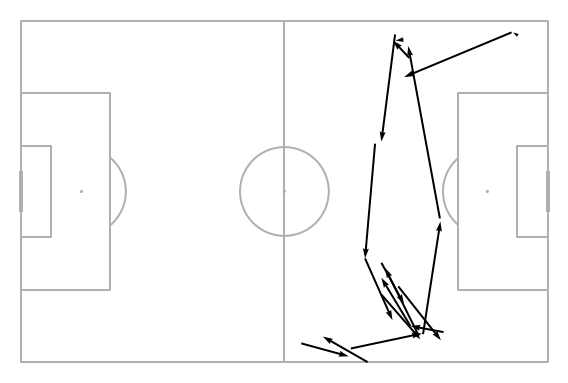

In [169]:
fig, ax = pitch.draw(figsize=(8, 8), constrained_layout=False, tight_layout=True)

# pitch.lines(df_all.loc[t_seq[30][0]:t_seq[30][1]]['x'],df_all.loc[t_seq[30][0]:t_seq[30][1]]['y'],
#            df_all.loc[t_seq[30][0]:t_seq[30][1]]['endX'],df_all.loc[t_seq[30][0]:t_seq[30][1]]['endY'],
#            comet=True,ax=ax)

pitch.arrows(df_trail['x'],df_trail['y'],
           df_trail['endX'],df_trail['endY'],
          ax=ax,width=2)




In [173]:
def calculate_len_and_time(df,match_id,home_team_id,t_seq):
    '''
    Calculates length of possession sequence and time elapsed for each sequence
    
    Inputs:
    df: dataframe containing the events
    t_seq: list of tuples containing indices of sequence start and end
    
    Output:
    returns dataframe (match_id,start_index,team,player_id,start_xy,end_xy,Home,length,time)
    '''
    
    df_sum = pd.DataFrame()


    df_sum = df.loc[[x[0] for x in t_seq]][['teamId','playerId','x','y','endX','endY']]   
    df_sum.loc[:,['seq_endX','seq_endY']] = df.loc[[x[1] for x in t_seq]][['x','y']].values

    df_sum['match_id'] = match_id

    display(df_sum)
    
    

SyntaxError: invalid syntax (<ipython-input-173-aeb6a2e92a25>, line 16)

In [218]:
df_sum = pd.DataFrame()
    
    
df_sum = df.loc[[x[0] for x in t_seq]][['teamId','playerId','x','y','endX','endY']]   
df_sum.loc[:,['seq_endX','seq_endY']] = df.loc[[x[1] for x in t_seq]][['x','y']].values
    
df_sum['match_id'] = match_id
    
display(df_sum)

,teamId,playerId,x,y,endX,endY,seq_endX,seq_endY,match_id
15,184,24148.0,40.0,0.0,22.0,6.5,60.4,0.0,154977
31,32,123761.0,60.4,0.0,41.2,5.5,64.5,27.2,154977
84,32,331924.0,63.7,0.0,66.0,9.2,75.2,68.0,154977
152,184,24148.0,61.9,0.0,62.5,10.9,56.8,8.7,154977
194,184,24148.0,32.5,0.0,18.5,14.9,32.1,13.2,154977
385,184,24148.0,90.6,0.0,67.4,3.5,68.3,22.5,154977
398,184,24148.0,69.0,0.0,76.8,9.4,39.7,27.7,154977
490,32,123761.0,30.1,0.0,27.8,11.2,45.4,0.0,154977
494,32,331924.0,45.4,0.0,35.8,6.0,51.5,0.0,154977
543,32,300299.0,51.5,0.0,39.1,5.6,42.0,61.5,154977
